In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
data= pd.read_csv("CarPrice_Assignment.csv")
print(data.head())
print(data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [4]:
data = data.drop(['CarName','car_ID'],axis=1)
data=pd.get_dummies(data,drop_first = True)

In [5]:
x=data.drop('price',axis=1)
y=data['price']

In [6]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(np.array(y).reshape(-1,1))

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
sgd_model = SGDRegressor(max_iter=1000 , tol=1e-3)

In [9]:
sgd_model.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [10]:
y_pred = sgd_model.predict(x_test)

In [11]:
mse = mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [12]:
print('Name : K RAGAPRIYAN')
print('Reg No : 212225040323')
print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R_2 : {r2:.4f}")

Name : K RAGAPRIYAN
Reg No : 212225040323
MSE : 0.22
MAE : 0.33
R_2 : 0.8249


In [13]:
print("\nModel Coefficients :")
print("Coefficients : ",sgd_model.coef_)
print("Intercept : ",sgd_model.intercept_)


Model Coefficients :
Coefficients :  [ 0.03260612  0.10389574  0.01842453  0.17079776  0.01888862  0.17031457
  0.2711187  -0.01008049 -0.07856335  0.00302514  0.11224561  0.03656672
 -0.0442815  -0.04970889 -0.01924485  0.01610164  0.02184465 -0.00627762
 -0.07990226 -0.00665107 -0.08993135 -0.03320257  0.06124736  0.20339629
  0.01435694 -0.09742372  0.06723003 -0.01844194  0.00386888  0.00939988
 -0.0238647  -0.14115061 -0.05734638  0.00079345 -0.01814994  0.00939988
 -0.00517809 -0.01255989  0.01924485 -0.01708766 -0.02760695 -0.03764416
 -0.01630737]
Intercept :  [-0.01133688]


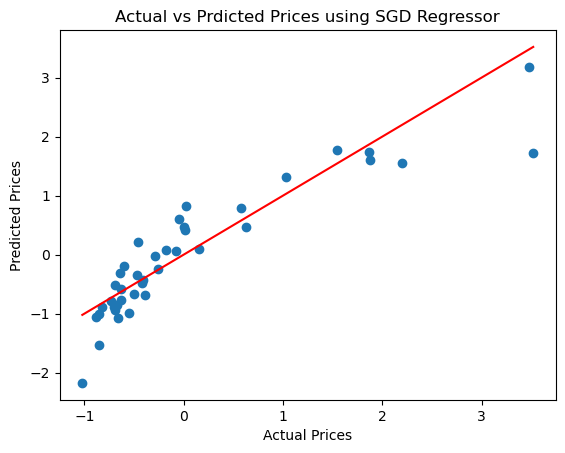

In [14]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Prdicted Prices using SGD Regressor")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.show()